Problem Statement:


This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [105]:
import pandas as pd
import numpy as np

In [106]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [107]:
#lets check the shape 
df.shape

(30, 17)

Their are total 30 rows and 17 columns.

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

 Output: Number of predicted wins (W)

In [108]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [109]:
#checking for missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Their are no missing values in the dataset.

In [110]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Above is the statistical summary of the dataset.
It gives us mean, median, max value and minimun value for each column.

In [111]:
#lets check the datatypes
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Their are 16 columns with int64 data type and 1 column with float64 datatype.

In [112]:
import seaborn as sns 
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='R', ylabel='W'>

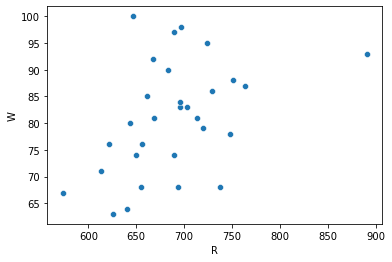

In [113]:
sns.scatterplot(x='R',y='W',data=df)

From the above plot it is clear that, more number of runs team scored,won more matches.
Their is linear relationship.

<AxesSubplot:xlabel='AB', ylabel='W'>

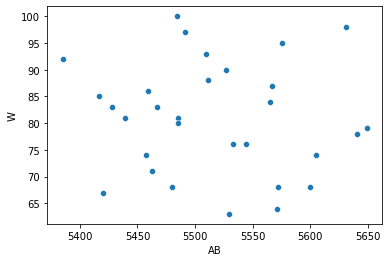

In [114]:
sns.scatterplot(x='AB',y='W',data=df)

Above plot is the mixture of increasing as well as downing trend.

<AxesSubplot:xlabel='H', ylabel='W'>

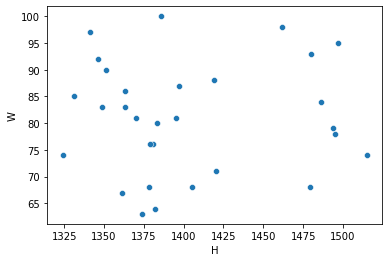

In [115]:
sns.scatterplot(x='H',y='W',data=df)

<AxesSubplot:xlabel='HR', ylabel='W'>

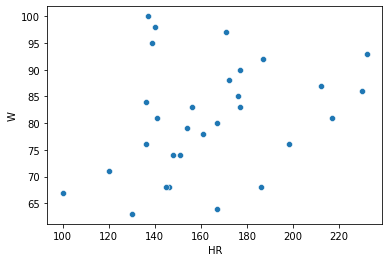

In [116]:
sns.scatterplot(x='HR',y='W',data=df)

Linear relation is established between above two columns.

<AxesSubplot:xlabel='ERA', ylabel='W'>

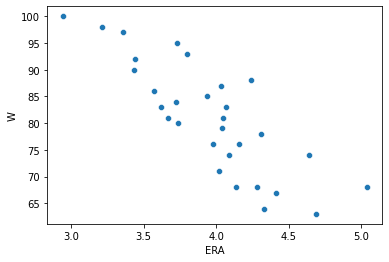

In [117]:
sns.scatterplot(x='ERA',y='W',data=df)

Their is downing trend in above graph.

<AxesSubplot:xlabel='SHO', ylabel='W'>

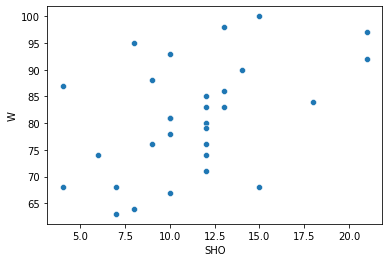

In [118]:
sns.scatterplot(x='SHO',y='W',data=df)

Their is increasing trend in the graph.

In [119]:
#correlation

df_cor=df.corr()
df_cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Their is positive as well as negative correlation is present in the dataset.

<AxesSubplot:>

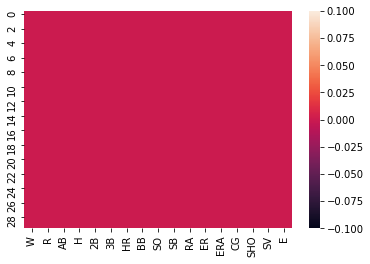

In [120]:
sns.heatmap(df.isnull())

Again, by above plot, their are no missing values in the dataset.

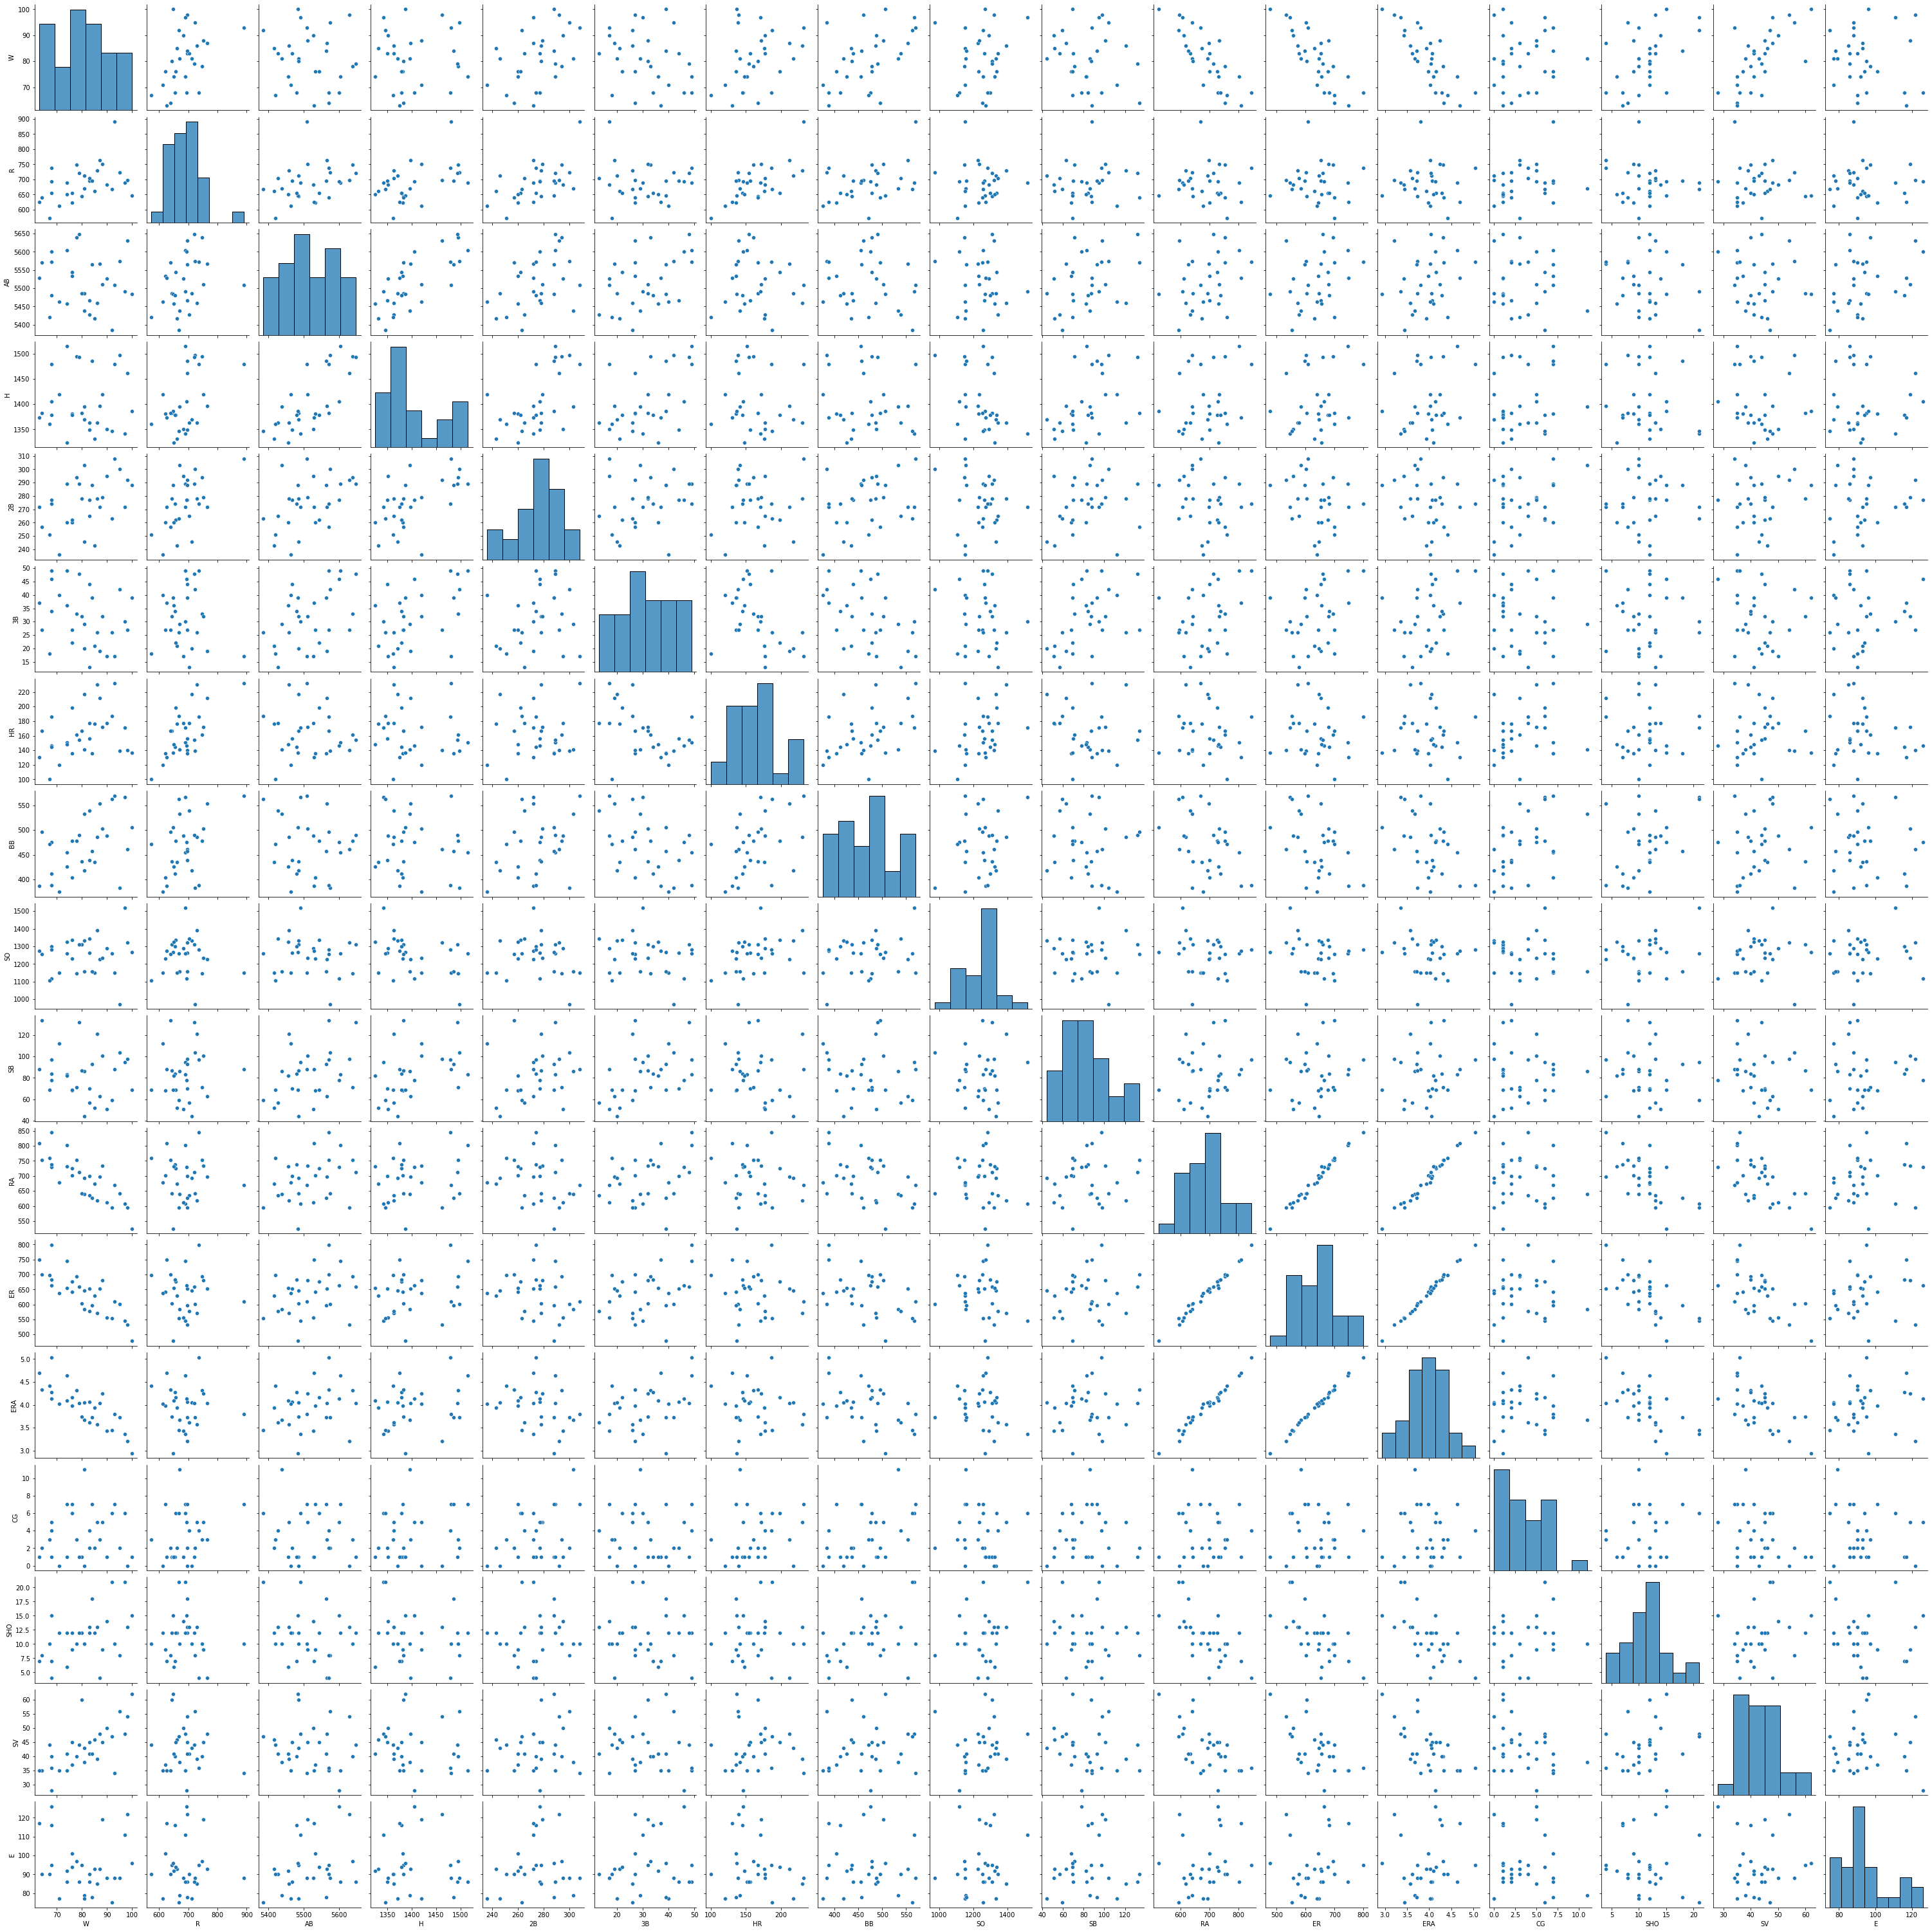

In [121]:
sns.pairplot(df)

Observation - Graphical representation of correlation of columns with each other.

<AxesSubplot:>

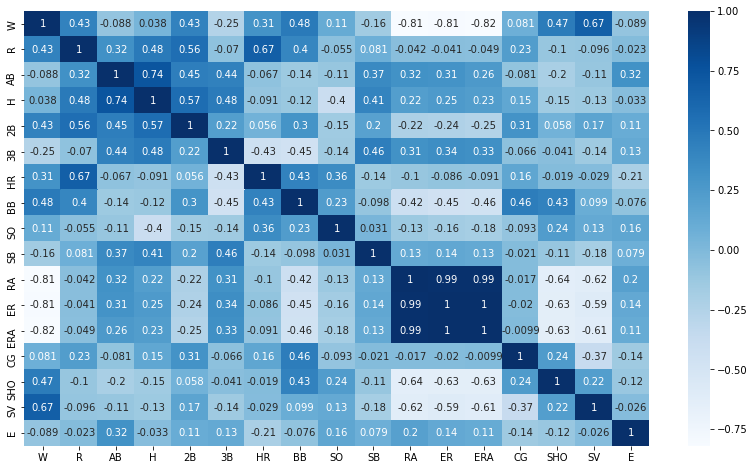

In [122]:
plt.figure(figsize=[14,8])
sns.heatmap(df_cor,cmap='Blues',annot=True)



Their is positive as well as negative correlation is present in the dataset.

<AxesSubplot:>

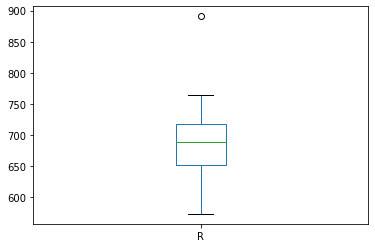

In [123]:
#checking for outliers.

df['R'].plot.box()

Their is one outlier in the column.

<AxesSubplot:>

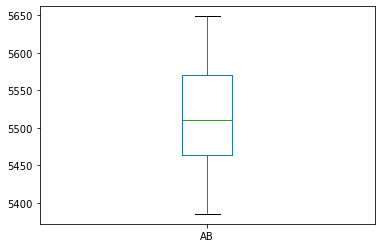

In [124]:
df['AB'].plot.box()

Their are no outliers present in 'AB' column.

<AxesSubplot:>

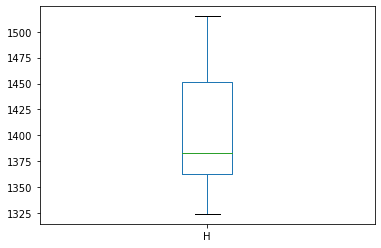

In [125]:
df['H'].plot.box()

Their are no outliers present in 'H' column.

<AxesSubplot:>

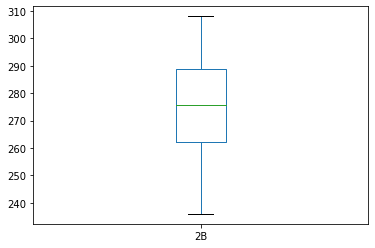

In [126]:
df['2B'].plot.box()

<AxesSubplot:>

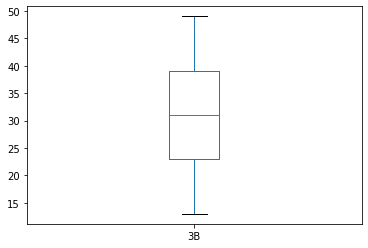

In [127]:
df['3B'].plot.box()

No outliers are present in '2B'and '3B' column.

<AxesSubplot:>

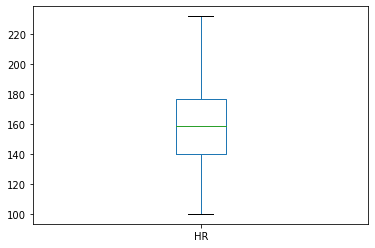

In [128]:
df['HR'].plot.box()

No outliers are present in 'HR' column.

<AxesSubplot:>

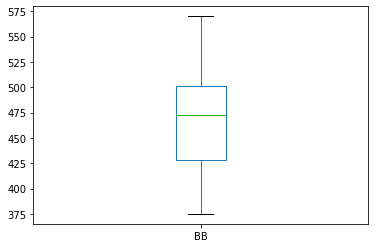

In [130]:
df['BB'].plot.box()

Thier are no outliers in 'BB' column.

<AxesSubplot:>

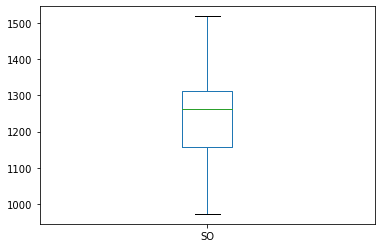

In [131]:
df['SO'].plot.box()

Thier are no outliers in 'SO' column.

<AxesSubplot:>

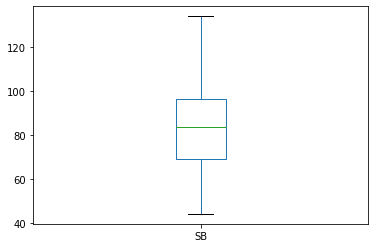

In [132]:
df['SB'].plot.box()

No outliers are present in SB column.

<AxesSubplot:>

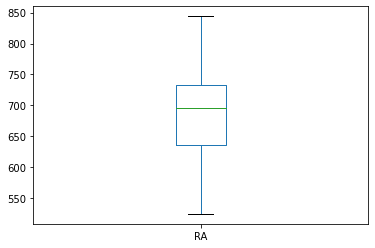

In [133]:
df['RA'].plot.box()

No outliers are present in RA column.

<AxesSubplot:>

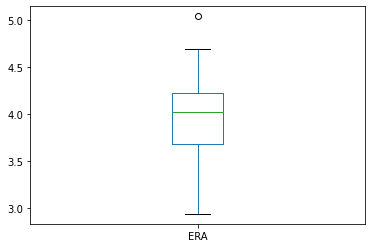

In [134]:
df['ERA'].plot.box()

Their is one outlier is present in ERA column.

<AxesSubplot:>

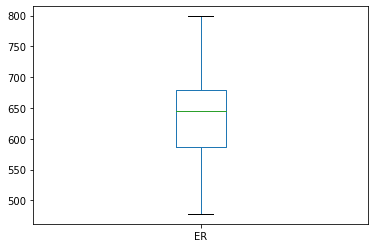

In [135]:
df['ER'].plot.box()

No ouliers are present in SB, RA and ERA column.

<AxesSubplot:>

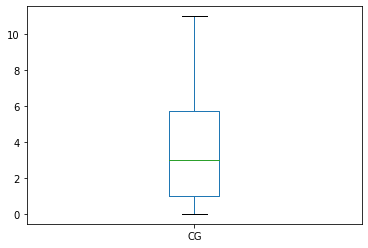

In [136]:
df['CG'].plot.box()

<AxesSubplot:>

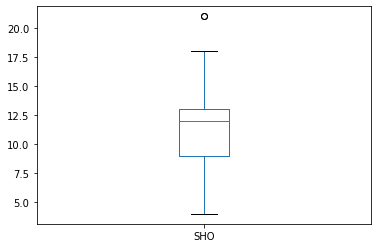

In [137]:
df['SHO'].plot.box()

Their is one outlier is present in SHO column.

<AxesSubplot:>

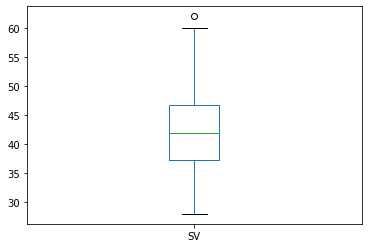

In [138]:
df['SV'].plot.box()

Their is one outlier is present in SV column.

<AxesSubplot:>

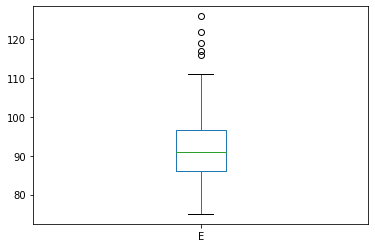

In [139]:
df['E'].plot.box()

There are ouliers present in E column.

In [141]:
#Removing the outliers for better results.

from scipy.stats import zscore

In [142]:
zscr=np.abs(zscore(df))
threshold = 3
print(np.where(zscr>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [158]:
zscr[5][1]

3.5096470447193067

In [143]:
df1=df[(zscr<3).all(axis=1)]
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [144]:
df.shape

(30, 17)

Shape of dataset before outlier removal.

In [145]:
df1.shape

(29, 17)

Shape of outlier after outlier removal.

As their is very minor data loss, we will proceed with new dataset, that is df1.

Let's split the dataset into X and y for further operations.

In [147]:
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [148]:
X=df1.drop('W',axis=1)

In [149]:
y=df1['W']

In [150]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [151]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

#lets check the skewness and distribution

In [152]:
X.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Their is skewness in H,CG,SHO,EV and E column.

C:\Users\Akshay Junankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='H', ylabel='Density'>

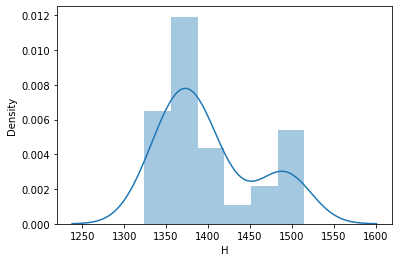

In [153]:
sns.distplot(df1['H'])

C:\Users\Akshay Junankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CG', ylabel='Density'>

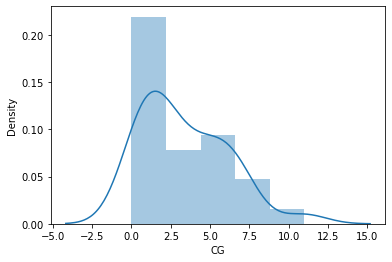

In [154]:
sns.distplot(df1['CG'])

Data is not normally distributed.

C:\Users\Akshay Junankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SHO', ylabel='Density'>

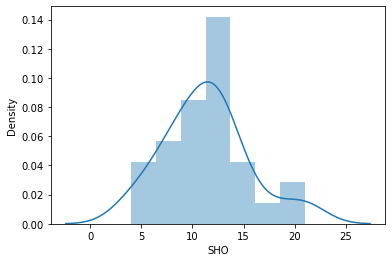

In [155]:
sns.distplot(df1['SHO'])

Data is normally distributed with a littlebit of skewness is present in SHO column.

C:\Users\Akshay Junankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SV', ylabel='Density'>

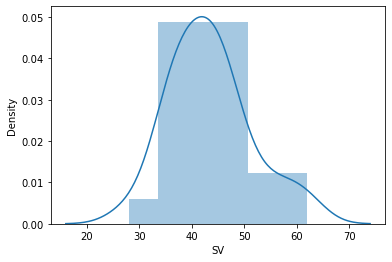

In [156]:
sns.distplot(df1['SV'])

Data is normally distributed.

C:\Users\Akshay Junankar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='H', ylabel='Density'>

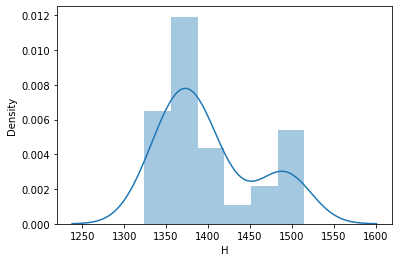

In [157]:
sns.distplot(df1['H'])

Data is not normally distributed.

In [218]:
from sklearn.preprocessing import power_transform

In [220]:
X_new=power_transform(X)
X_new=pd.DataFrame(X_new,columns=X.columns)

In [221]:
X_new.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Skewness is removed.

In [222]:
X_new

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.153276,0.121871,-2.064039,0.677176,0.082858
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,0.197363,-1.732896,-0.252844,0.052325,-1.588197
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.487168,-0.870682,0.236737,1.908137,0.237592
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.769577,0.121871,-0.252844,-0.365006,0.383386
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.615685,0.770649,-0.513555,0.312020,1.554265


In [223]:
X_new.drop('AB',axis=1,inplace=True)

In [224]:
X_new.drop('H',axis=1,inplace=True)

As the all the values in columns, AB and H are zero, we dropped them.

In [225]:
x=X_new.copy()

In [226]:
x

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820
5,1.964209,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.153276,0.121871,-2.064039,0.677176,0.082858
6,0.698146,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,0.197363,-1.732896,-0.252844,0.052325,-1.588197
7,-0.852595,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.487168,-0.870682,0.236737,1.908137,0.237592
8,1.555951,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.769577,0.121871,-0.252844,-0.365006,0.383386
9,1.631727,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.615685,0.770649,-0.513555,0.312020,1.554265


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [232]:
#finding best random_state
maxr2_score=0
maxRs=0
for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    r_2=r2_score(y_test,pred)
    if r_2>maxr2_score:
    
        maxr2_score=r_2
        maxRs=i
        
print("Best r2_score is", maxr2_score*100,"on Random state", maxRs)    

Best r2_score is 84.52745443557107 on Random state 35


In [233]:
#Lets create train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

In [234]:
LR=LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

-0.42885218983935336
205.0491093171931
Root mean squared Error: 14.319535932326616


In [236]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.710512336545079
41.54326666666668
Root mean squared Error: 6.4454066331509825


In [237]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.1394477527861302
123.49455952609904
Root mean squared Error: 11.112810604257549


In [238]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
print('Root mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

0.09488988300068812
129.88888888888889
Root mean squared Error: 11.396880664852505


Hyper Parameter tuning for RandomForestregressor()

In [239]:
parameters={'n_estimators':[100],
           'max_features':['auto'],
           'max_depth':[4,5,6,7,8],
           'criterion':['mse']}

In [241]:
GCV_rf=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV_rf.fit(x_train,y_train)
GCV_rf.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [243]:
RF_mod=RandomForestRegressor(criterion='mse',max_depth=8,max_features='auto',n_estimators=100)
RF_mod.fit(x_train,y_train)
pred=RF_mod.predict(x_test)
print(r2_score(y_test,pred))

0.7334881968341365


From the above observations, we got RandomForestRegressor as our best model.

In [244]:
#model Saving

import joblib

In [245]:
joblib.dump(RF_mod,"Baseball.pkl")

['Baseball.pkl']

In [246]:
#Model Loding

Baseball_Model=joblib.load("Baseball.pkl")